In [12]:
# import dependencies
import pandas as pd
from prophet import Prophet
import datetime
from sklearn.preprocessing import StandardScaler,OneHotEncoder

In [5]:
#import dataframe
df = pd.read_csv("diaster_data_clean.csv")
df.head()

,fema_declaration_string,disaster_number,state,declaration_type,declaration_date,fy_declared,incident_type,declaration_title,ih_program_declared,ia_program_declared,pa_program_declared,hm_program_declared,incident_begin_date,fips,place_code,designated_area,declaration_request_number,hash,last_refresh,id
0,DR-1-GA,1,GA,DR,1953-05-02,1953,Tornado,Tornado,0,1,1,1,1953-05-02,13000,0,Statewide,53013,bb121323c9c29d3bef0c9a3f134bfd8b5ecff148,2021-07-13T23:01:19Z,60c3b7a9a0ee349d71025780
1,DR-2-TX,2,TX,DR,1953-05-15,1953,Tornado,Tornado & Heavy Rainfall,0,1,1,1,1953-05-15,48000,0,Statewide,53003,c879557e78d059e6847e7688388c339d10f51979,2021-07-13T23:01:19Z,60c3b7a9a0ee349d71025783
2,DR-3-LA,3,LA,DR,1953-05-29,1953,Flood,Flood,0,1,1,1,1953-05-29,22000,0,Statewide,53005,4fb19699fdbba1387ffa2263fcc4a4e37a1de6d6,2021-07-13T23:01:19Z,60c3b7a9a0ee349d71025777
3,DR-4-MI,4,MI,DR,1953-06-02,1953,Tornado,Tornado,0,1,1,1,1953-06-02,26000,0,Statewide,53004,87a0c1dd5da249767f545e0c0a43f917e4e9ca83,2021-07-13T23:01:19Z,60c3b7a9a0ee349d7102577a
4,DR-5-MT,5,MT,DR,1953-06-06,1953,Flood,Floods,0,1,1,1,1953-06-06,30000,0,Statewide,53006,954449c15634fb45c8bea3ac975782793ccde050,2021-07-13T23:01:19Z,60c3b7a9a0ee349d71025774


In [6]:
df.dtypes

fema_declaration_string       object
disaster_number                int64
state                         object
declaration_type              object
declaration_date              object
fy_declared                    int64
incident_type                 object
declaration_title             object
ih_program_declared            int64
ia_program_declared            int64
pa_program_declared            int64
hm_program_declared            int64
incident_begin_date           object
fips                           int64
place_code                     int64
designated_area               object
declaration_request_number     int64
hash                          object
last_refresh                  object
id                            object
dtype: object

In [10]:
df["incident_begin_date"]= pd.to_datetime(df["incident_begin_date"])

In [11]:
df.dtypes

fema_declaration_string               object
disaster_number                        int64
state                                 object
declaration_type                      object
declaration_date                      object
fy_declared                            int64
incident_type                         object
declaration_title                     object
ih_program_declared                    int64
ia_program_declared                    int64
pa_program_declared                    int64
hm_program_declared                    int64
incident_begin_date           datetime64[ns]
fips                                   int64
place_code                             int64
designated_area                       object
declaration_request_number             int64
hash                                  object
last_refresh                          object
id                                    object
dtype: object

In [14]:
df.incident_type.value_counts()

Severe Storm(s)     17065
Hurricane           12005
Flood               10454
Biological           7853
Snow                 3664
Fire                 3527
Severe Ice Storm     2942
Tornado              1488
Drought              1292
Coastal Storm         570
Freezing              301
Earthquake            227
Typhoon               130
Volcano                51
Fishing Losses         42
Mud/Landslide          36
Dam/Levee Break        13
Toxic Substances        9
Chemical                9
Tsunami                 9
Human Cause             7
Terrorist               5
Name: incident_type, dtype: int64

In [24]:
df_encoded = pd.get_dummies(df, columns=["incident_type"])
df_encoded.head()

,fema_declaration_string,disaster_number,state,declaration_type,declaration_date,fy_declared,declaration_title,ih_program_declared,ia_program_declared,pa_program_declared,...,incident_type_Mud/Landslide,incident_type_Severe Ice Storm,incident_type_Severe Storm(s),incident_type_Snow,incident_type_Terrorist,incident_type_Tornado,incident_type_Toxic Substances,incident_type_Tsunami,incident_type_Typhoon,incident_type_Volcano
0,DR-1-GA,1,GA,DR,1953-05-02,1953,Tornado,0,1,1,...,0,0,0,0,0,1,0,0,0,0
1,DR-2-TX,2,TX,DR,1953-05-15,1953,Tornado & Heavy Rainfall,0,1,1,...,0,0,0,0,0,1,0,0,0,0
2,DR-3-LA,3,LA,DR,1953-05-29,1953,Flood,0,1,1,...,0,0,0,0,0,0,0,0,0,0
3,DR-4-MI,4,MI,DR,1953-06-02,1953,Tornado,0,1,1,...,0,0,0,0,0,1,0,0,0,0
4,DR-5-MT,5,MT,DR,1953-06-06,1953,Floods,0,1,1,...,0,0,0,0,0,0,0,0,0,0


In [52]:
data = [df_encoded["incident_begin_date"], df_encoded["incident_type_Hurricane"]]
headers=["ds", "y"]

In [53]:
df_prophet = pd.concat(data, axis=1, keys=headers)
df_prophet.head()

,ds,y
0,1953-05-02,0
1,1953-05-15,0
2,1953-05-29,0
3,1953-06-02,0
4,1953-06-06,0


In [54]:
df_prophet.dtypes

ds    datetime64[ns]
y              uint8
dtype: object

In [57]:
df_prophet["y"] = df_prophet["y"].astype("int32")

In [58]:
df_prophet.dtypes

ds    datetime64[ns]
y              int32
dtype: object

In [60]:
m = Prophet()
m.fit(df_prophet)

INFO:numexpr.utils:NumExpr defaulting to 4 threads.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [61]:
future = m.make_future_dataframe(periods=365)
future.tail()

,ds
3279,2022-07-31
3280,2022-08-01
3281,2022-08-02
3282,2022-08-03
3283,2022-08-04


In [62]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()


,ds,yhat,yhat_lower,yhat_upper
3279,2022-07-31,0.292709,-0.004914,0.607052
3280,2022-08-01,0.240098,-0.104407,0.561196
3281,2022-08-02,0.256003,-0.054791,0.583110
3282,2022-08-03,0.282289,-0.038154,0.589003
3283,2022-08-04,0.278198,-0.045520,0.603067


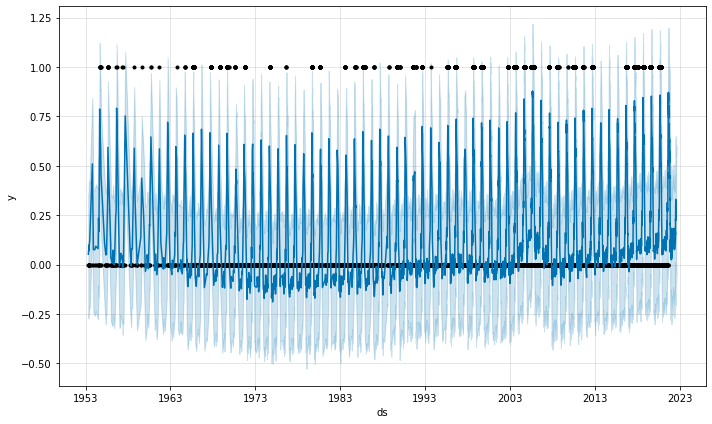

In [63]:
fig1 = m.plot(forecast)
